In [47]:
import yfinance as yf


spy = yf.Ticker("SPY")
dji = yf.Ticker("^DJI")

# get stock info
print(spy.info)

{'previousClose': 358.1, 'regularMarketOpen': 360.98, 'twoHundredDayAverage': 325.3067, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 362.58, 'navPrice': 357.99, 'averageDailyVolume10Day': 86833933, 'totalAssets': 277588738048, 'regularMarketPreviousClose': 358.1, 'fiftyDayAverage': 343.11972, 'trailingAnnualDividendRate': None, 'open': 360.98, 'toCurrency': None, 'averageVolume10days': 86833933, 'expireDate': None, 'yield': 0.0174, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 359.59, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 65775367, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 76586298, 'priceToSalesTrailing12Months': None, 'dayLow': 359.59, 'ask': 0, 'ytdReturn': None, 'askSize': 1400, 'volume': 65775367, 'fif

In [48]:
history = dji.history(period='60d',
    interval='30m')

In [58]:
spy_history = spy.history(period='60d',
    interval='1d')

In [49]:
history_day = dji.history(period='60d',
    interval='1d')

In [50]:
# prv - (30-open) + (close-hour)

In [51]:
half_into_condition = (history.index.hour == 9) & (history.index.minute == 30)
hour_before_condition = (history.index.hour == 15) & (history.index.minute == 0)

In [52]:
minus = history[half_into_condition]['Close']

In [53]:
plus = history[hour_before_condition]['Open']

In [54]:
plus.index = plus.index.date

In [55]:
minus.index = minus.index.date

In [56]:
data = history_day.merge(plus, left_index=True, right_index=True).merge(minus, left_index=True, right_index=True)

In [57]:
data['SMI'] = (data['Close_x'] - data['Open_y'] + data['Open_x'] - data['Close_y']).cumsum()

<AxesSubplot:xlabel='Date'>

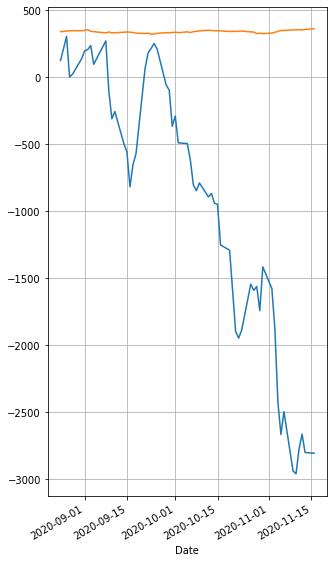

In [59]:
ax = data['SMI'].plot(figsize=[5,10])
spy_history['Close'].plot(ax=ax, grid=True)

In [60]:
plus.tail()

2020-11-10    29390.439453
2020-11-11    29338.419922
2020-11-12    28981.630859
2020-11-13    29482.580078
2020-11-16    29840.230469
Name: Open, dtype: float64

In [61]:
history_day.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-10,29254.169922,29478.859375,29126.990234,29420.919922,526980000,0,0
2020-11-11,29524.349609,29593.109375,29281.220703,29397.630859,376700000,0,0
2020-11-12,29231.910156,29311.830078,28902.130859,29080.169922,369320000,0,0
2020-11-13,29203.900391,29559.250000,29203.900391,29479.810547,348810000,0,0
2020-11-16,29672.359375,29964.289062,29672.359375,29950.439453,418290000,0,0


In [62]:
data['SMI'].tail()

Date
2020-11-10   -2958.986328
2020-11-11   -2772.246094
2020-11-12   -2662.277344
2020-11-13   -2799.546875
2020-11-16   -2804.597656
Name: SMI, dtype: float64

<AxesSubplot:label='63482b75-c906-4091-ae68-7008376ed68d', xlabel='Date'>

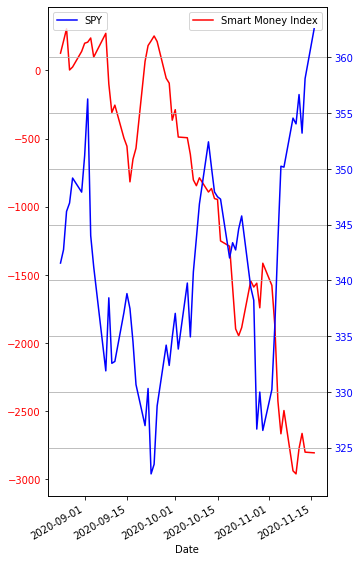

In [63]:
ax = data['SMI'].plot(figsize=[5,10], color='red', label='Smart Money Index', legend=True)
ax.tick_params(axis='y', labelcolor='red')
ax2 = ax.twinx()
ax2.tick_params(axis='y', labelcolor='blue')
spy_history['Close'].plot(ax=ax2, grid=True, color='blue', label='SPY', legend=True)
